<a href="https://colab.research.google.com/github/RedeemerNtumy/JCPennyConsultancyProject/blob/master/3549063_BD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University of Stirling

# ITNPBD2 Representing and Manipulating Data

# Assignment Autumn 2025

# A Consultancy Job for JC Penney



`### 1. BUSINESS UNDERSTANDING`
JC Penney has provided data about products boughts by their customers across their stores and the reviews of those who bought them. While there is no specific business goal to address, the goal of this project is conduct an exploratory data analysis to identify and quantify key strategic opportunities for JCPenney leadership.


### 2. DATA UNDERSTANDING

In [129]:
#Importing the necessary packages needed for data exploration and manipulation
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests

In [130]:
# Loading products data from csv
products = pd.read_csv("products.csv")

In [131]:
# Loading products data from json as well since it has extra features I would love to explore and utilise
products_json = pd.read_json("jcpenney_products.json", lines= True) # Setting Lines to true since each line in the json data is a json object

In [132]:
# Loading users data
users = pd.read_csv("users.csv")

In [133]:
# Loading reviews data
reviews = pd.read_csv("reviews.csv")

#### 2.1 Product Data Exploration

In [134]:
products.head(3)

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625


In [135]:
# Creating this function to be used for all datasets
def data_summary(data_frame):
  '''
  This function takes the Dataframe
  as an argument and prints out the:
  1. Information about the data
  2. Dimensions of the data
  3. Descriptive Statistics about the data
  '''
  print(data_frame.info())
  print(f" This data has {data_frame.shape[0]} rows and {data_frame.shape[1]} columns")
  print(data_frame.describe())

In [136]:
data_summary(products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB
None
 This data has 7982 rows and 6 columns
              Price     Av_Score
count   5816.000000  7982.000000
mean     144.776618     2.988683
std      499.223719     0.911673
min      -65.270000     1.000000
25%       40.700000     2.500000
50%       58.010000     3.000000
75%       87.020000     3.500000
max    17122.170000     5.000000


#### 2.2 Users Data Exploration

In [137]:
users.head(3)

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho


In [138]:
data_summary(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB
None
 This data has 5000 rows and 3 columns
        Username         DOB          State
count       5000        5000           5000
unique      4999          52             57
top     dqft3311  07.08.1953  Massachusetts
freq           2         112            107


#### 2.3 Reviews Data Exploration

In [139]:
reviews.head(3)

,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...


In [140]:
data_summary(reviews)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None
 This data has 39063 rows and 4 columns
              Score
count  39063.000000
mean       1.487648
std        1.400332
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000


#### 2.4 Observations

Products Dataset:
- Contains 7,982 products with 6 columns
- Negative prices detected (minimum price is negative)
- Missing values found in SKU column

Users Dataset:
- Contains exactly 5000 reviews
- Massachusettes has the highest number of users
- DOB needs conversion to calculate customer age

Reviews Dataset:
- Contains 39063 reviews with 6 columns
- Links customers to products via Username and Uniq_id
- Can be merged with users and products for deeper analysis

### 3. DATA PREPARATION

In [141]:
# Creating a copy of the initial dataset for data intergrity
updated_products = products.copy()

In [142]:
# Finding the number of negative prices
len(updated_products[updated_products["Price"]<0])

44

In [143]:
updated_products["Price"] = abs(updated_products["Price"])
updated_products.describe() # Verifying that negative prices are removed

,Price,Av_Score
count,5816.000000,7982.000000
mean,145.424555,2.988683
std,499.035327,0.911673
min,8.010000,1.000000
25%,41.042500,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


In [144]:
# Checking for null values
updated_products.isna().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,2166
Av_Score,0


In [145]:
# Filling all null SKU values with "MISSING_SKU"
updated_products["SKU"] = updated_products["SKU"].fillna("MISSING_SKU")

In [146]:
# Confirming if all null skus have been filled
updated_products.isna().sum()

,0
Uniq_id,0
SKU,0
Name,0
Description,543
Price,2166
Av_Score,0


In [147]:
# Creating a copy since I plan on adding more features to the data
updated_users = users.copy()

In [148]:
# Convert the 'DOB' column to datetime objects
# Use dayfirst=True to correctly parse the date format 'dd.mm.yyyy'
updated_users['DOB'] = pd.to_datetime(updated_users['DOB'], format='%d.%m.%Y',
                                      errors='coerce')

In [149]:
# Calculate the current date
current_date = pd.to_datetime('today')

In [150]:
# Calculate the age
# Subtract the birth year from the current year
updated_users['Age'] = (current_date.year - updated_users['DOB'].dt.year)

In [151]:
# Adjust age for birthdays that haven't happened yet this year
updated_users['Age'] = updated_users.apply(lambda row:
                  row['Age'] - ((current_date.month < row['DOB'].month) |
                  ((current_date.month == row['DOB'].month) &
                  (current_date.day < row['DOB'].day))) if pd.notna(row['DOB'])
                  else row['Age'], axis=1)

In [152]:
# Trying to obtain extra insights from the new column
updated_users["Age"].describe()

,Age
count,5000.000000
mean,49.761200
std,15.000146
min,24.000000
25%,37.000000
50%,50.000000
75%,63.000000
max,75.000000


Having similar mean and median values implies the age distribution is roughly symmetric with no strong skewness. I would later visualize this.

In [153]:
"""
From the initial exploration, I realised
Massachusetts had the highest number of users.
This is suprising as JC Penney has customers
across all states with Massachusetts not being
the biggest state in the US.

This has led me to include population data of
every state in the US so I can compare against
their number of customers
"""

try:
    # Access to the API requires an API key
    with open("key.txt") as key:
        api_key = key.read()

    # Fetch population data from Census API. Most current year available is 2023
    api_url = f"https://api.census.gov/data/2023/pep/charv?get=POP&for=state:*&key={api_key}"

    response = requests.get(api_url)
    response.raise_for_status()

    data = response.json()
    population_df = pd.DataFrame(data[1:], columns=data[0])

    print("Successfully fetched US Census population data")

except Exception as e:
    print(f"Warning: Could not fetch Census data - {e}")
    population_df = None

Successfully fetched US Census population data


In [154]:
# Loading custom fip codes csv as the states from the external data are written with fip codes
usa_fips = pd.read_csv("us_states_fips.csv")

In [155]:
# This dataset maps a state to its Fip code
usa_fips.head(3)

,FIPS,State
0,1,Alabama
1,2,Alaska
2,4,Arizona


In [156]:
# Convert the 'state' column in population_df to numeric for merging
population_df['state'] = pd.to_numeric(population_df['state'])

In [157]:
# Merge population_df with usa_fips to add state names
merged_population_df = pd.merge(population_df, usa_fips, left_on='state',
                                right_on='FIPS', how='left')

In [158]:
# Drop the redundant FIPS column from the merged DataFrame
merged_population_df = merged_population_df.drop('FIPS', axis=1)

In [159]:
# Rename the 'state' column to 'FIPS' for clarity
merged_population_df = merged_population_df.rename(columns={'state': 'FIPS'})

In [160]:
# Keeping the higher estimate
latest_population_df = merged_population_df.iloc[1::2].reset_index(drop=True)
latest_population_df['POP'] = pd.to_numeric(latest_population_df['POP'])

In [161]:
# Merging products and reviews data for analysis expansion
merged_user_reviews = pd.merge(updated_users,
                               reviews, on='Username', how='inner')

In [162]:
# Define age groups
age_bins = np.arange(min(updated_users['Age']),max(updated_users['Age'])+ 1,10)
age_bins[-1] += 2 # Catering for those who above 74
age_labels = ['24-34', '35-44', '45-54', '55-64', '65-75']

In [163]:
# Create a new column 'Age_Group'
merged_user_reviews['Age_Group'] = pd.cut(merged_user_reviews['Age'],
                                          bins=age_bins,
                                          labels=age_labels, right=False)

In [164]:
# Merge merged_user_reviews with updated_products to get product names
merged_data_with_names = pd.merge(merged_user_reviews,
                                  updated_products[['Uniq_id', 'Name']],
                                  on='Uniq_id', how='left')

In [165]:
# json has information about product category which may prove useful
all_categories = [
    'Uncategorised' if (not c or pd.isna(c)) else c
    for category_list in products_json['category']
    for c in (
        category_list if isinstance(category_list, list)
        else [category_list] if isinstance(category_list, str)
        else [None]
    )
]

In [166]:
category_counts = pd.Series(all_categories).value_counts()
print(f"There are {len(category_counts)} categories in the dataset")

There are 1169 categories in the dataset


### 4. DATA MODELLING AND ANALYSIS

In [167]:
def plot_top_distribution(data, title, xlabel, ylabel,
                          is_series=True, labels=None, values=None):
    """
    Plots a bar chart of the top items in a dataset.

    Parameters:
    - data: pandas Series or any data used for plotting
    - title: str, chart title
    - xlabel: str, label for the x-axis
    - ylabel: str, label for the y-axis
    - is_series: bool, True if 'data' is a pandas Series (default)
    - labels, values: lists or arrays, optional — used if is_series=False
    """
    plt.figure(figsize=(12, 6))

    if is_series:
        # Plot directly from a pandas Series
        data.plot(kind='bar')
    else:
        # Plot manually using labels and values
        plt.bar(labels, values)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()

#### 4.1 Top 10 products by SKU

In [168]:
# Get the counts for the top 10 SKUs
top_10_sku_counts = updated_products['SKU'].value_counts().nlargest(10)

In [169]:
# Replace SKU with the most frequent product name for plotting, keep 'MISSING_SKU'
plot_labels = [
    "MISSING_SKU" if sku == "MISSING_SKU"
    else updated_products[updated_products['SKU'] == sku]['Name'].value_counts().index[0]
    for sku in top_10_sku_counts.index
]

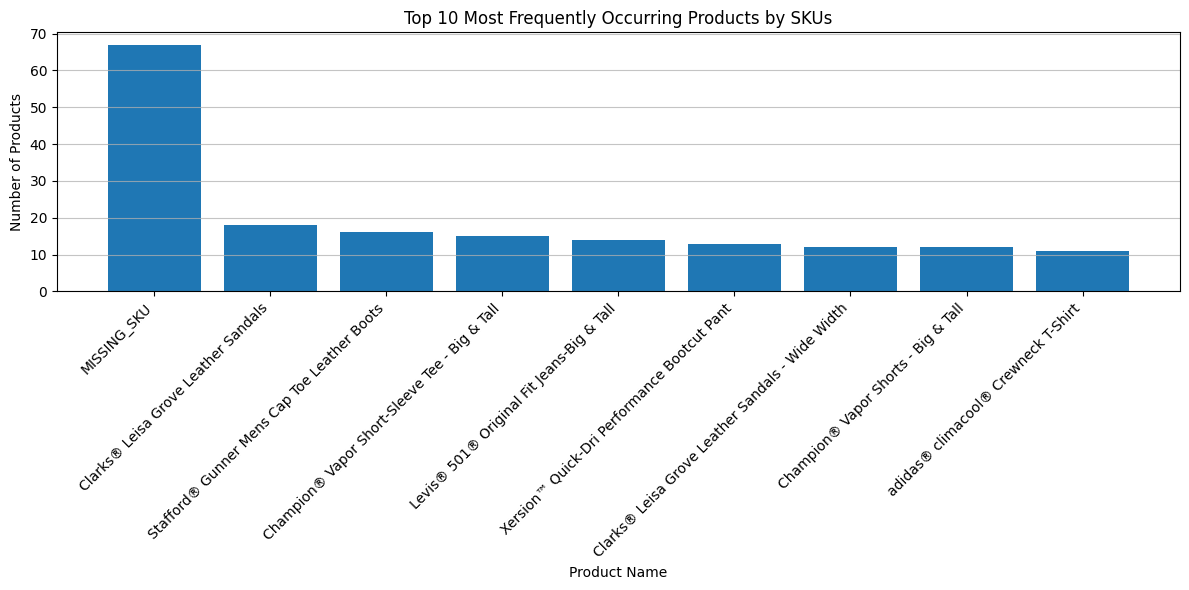

In [170]:
# Distribution of the top 10 most bought SKUs with product names
"""
A bar chart was used because it clearly displays the relative frequency
of product purchases across different SKUs. Since the goal was to identify which
products were bought most often, the bar chart’s categorical
layout allows for easy comparison of counts and highlights standout products at a glance.
"""
plot_top_distribution(
    data=None,
    title='Top 10 Most Frequently Occurring Products by SKUs',
    xlabel='Product Name',
    ylabel='Number of Products',
    is_series=False,
    labels=plot_labels,
    values=top_10_sku_counts.values
)


#### 4.2 Most Frequently bought products

In [171]:
# Get the counts for the top 10 products
top_10_product_name_counts = updated_products['Name'].value_counts().nlargest(10)

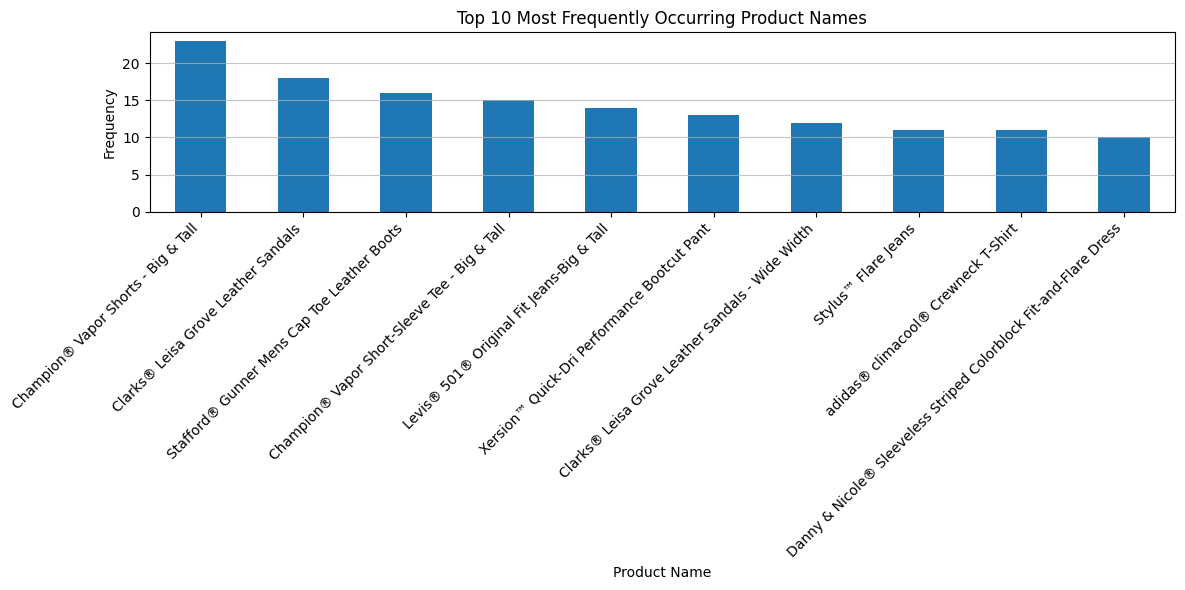

In [172]:
plot_top_distribution(
    data=top_10_product_name_counts,
    title='Top 10 Most Frequently Occurring Product Names',
    xlabel='Product Name',
    ylabel='Frequency'
)

#### 4.3 Top 5 Brands among the top selling products

In [173]:
# Get the counts for the top 10 products
top_10_products_df = updated_products[updated_products['Name'].isin(plot_labels)].copy()

In [174]:
# Merge with brand information
merged_top_products = pd.merge(
    top_10_products_df,
    products_json[['uniq_id', 'brand']],
    left_on='Uniq_id',
    right_on='uniq_id',
    how='left'
)

In [175]:
# Count brand occurrences in top products
top_brand_counts = merged_top_products['brand'].value_counts()
for brand, count in top_brand_counts.head(5).items():
    print(f"  {brand}: {count} products")

  Champion: 38 products
  Clarks: 30 products
  STAFFORD: 16 products
  Levi: 14 products
  Xersion: 13 products


#### 4.4 Geographic Distribution

In [176]:
# Looking for the states with most and least customers
state_counts = users['State'].value_counts()
top_20_states = state_counts.head(20)
bottom_20_states = state_counts.tail(20)

#### 4.4.1 Top 20

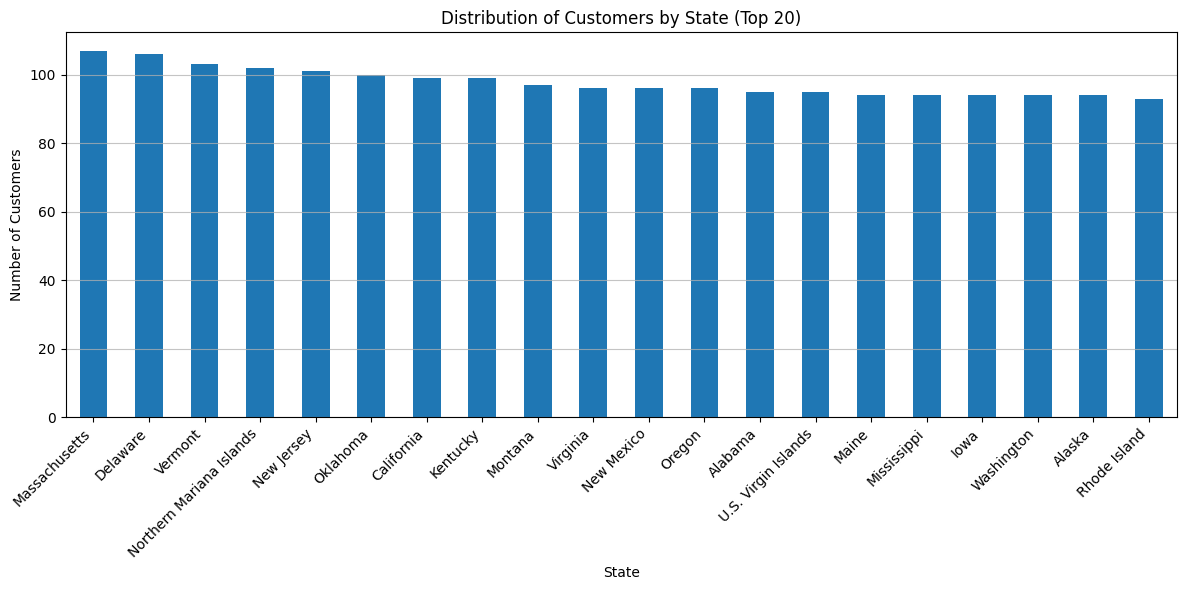

In [177]:
plot_top_distribution(
    data=top_20_states,
    title='Distribution of Customers by State (Top 20)',
    xlabel='State',
    ylabel='Number of Customers'
)

#### 4.4.2 Bottom 20

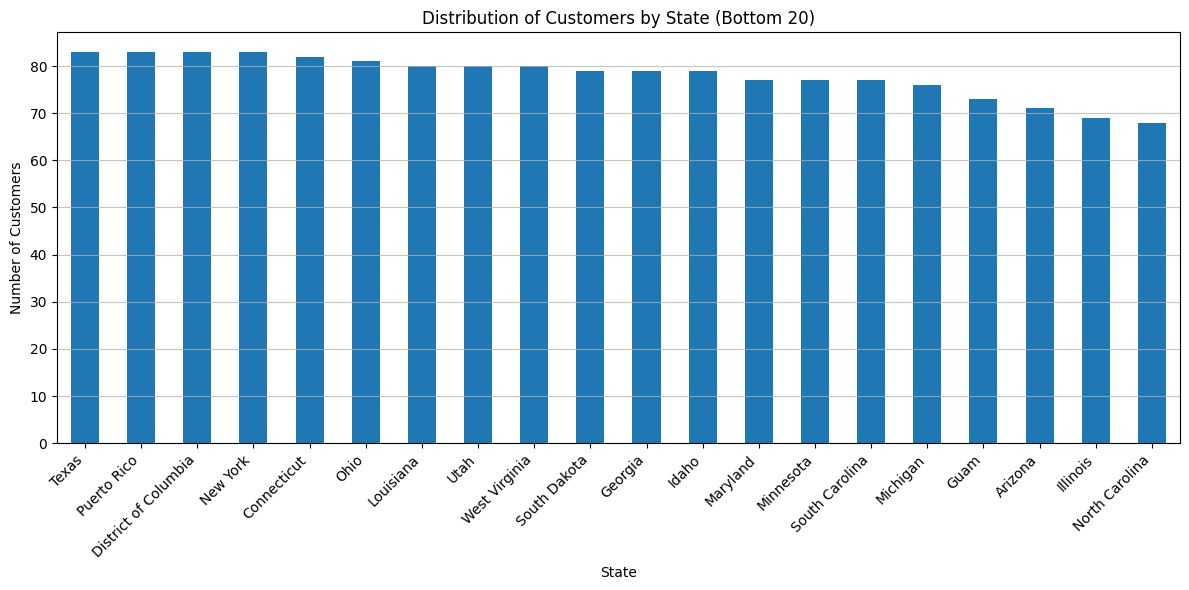

In [178]:
plot_top_distribution(
    data=bottom_20_states,
    title='Distribution of Customers by State (Bottom 20)',
    xlabel='State',
    ylabel='Number of Customers'
)

In [179]:
"""
As mentioned earlier, this insight can be misleading with the
help of the population data, I can now calculate rate per population
"""
user_counts_by_state = updated_users['State'].value_counts().reset_index()
user_counts_by_state.columns = ['State', 'User_Count']
merged_population_users = pd.merge(user_counts_by_state, latest_population_df, on='State', how='inner')


In [180]:
""""
I used 100,000 as the standardisation factor because it is a common
statistical convention for comparing rates across populations
of different sizes. It has allowed me to compare between states,
regardless of how large or small their populations are,
making it easy for me to identify where JC Penney has proportionally
higher market penetration
"""
merged_population_users['Rate_Per_100K'] = (merged_population_users['User_Count'] / merged_population_users['POP']) * 100000

In [181]:
# Sort by User_Count to get the top 20 states by user count
top_20_states_by_users = merged_population_users.sort_values(by='User_Count',
                                                    ascending=False).head(20)

In [182]:
# Sort the data by Rate_Per_100K to see which states perform best relative to population
top_20_states_by_rate = merged_population_users.sort_values(by='Rate_Per_100K', ascending=False).head(20)

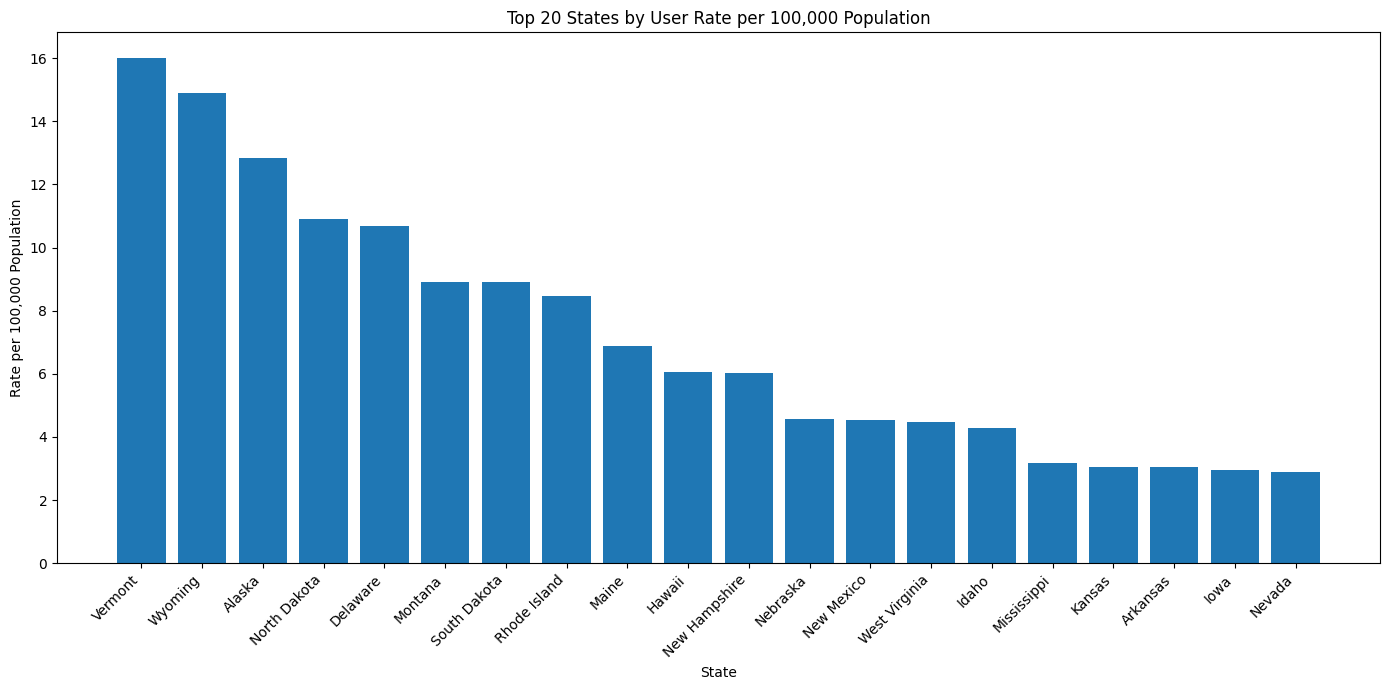

In [183]:
# Plotting Rate Per 100K for the top 20 states
plt.figure(figsize=(14, 7))
plt.bar(top_20_states_by_rate['State'], top_20_states_by_rate['Rate_Per_100K'])
plt.title('Top 20 States by User Rate per 100,000 Population')
plt.xlabel('State')
plt.ylabel('Rate per 100,000 Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

In [184]:
# Bottom 20
bottom_20_states_by_users = merged_population_users.sort_values(by='User_Count',
                                                    ascending=False).tail(20)
bottom_20_states_by_rate = merged_population_users.sort_values(
    by='Rate_Per_100K', ascending=False).tail(20)

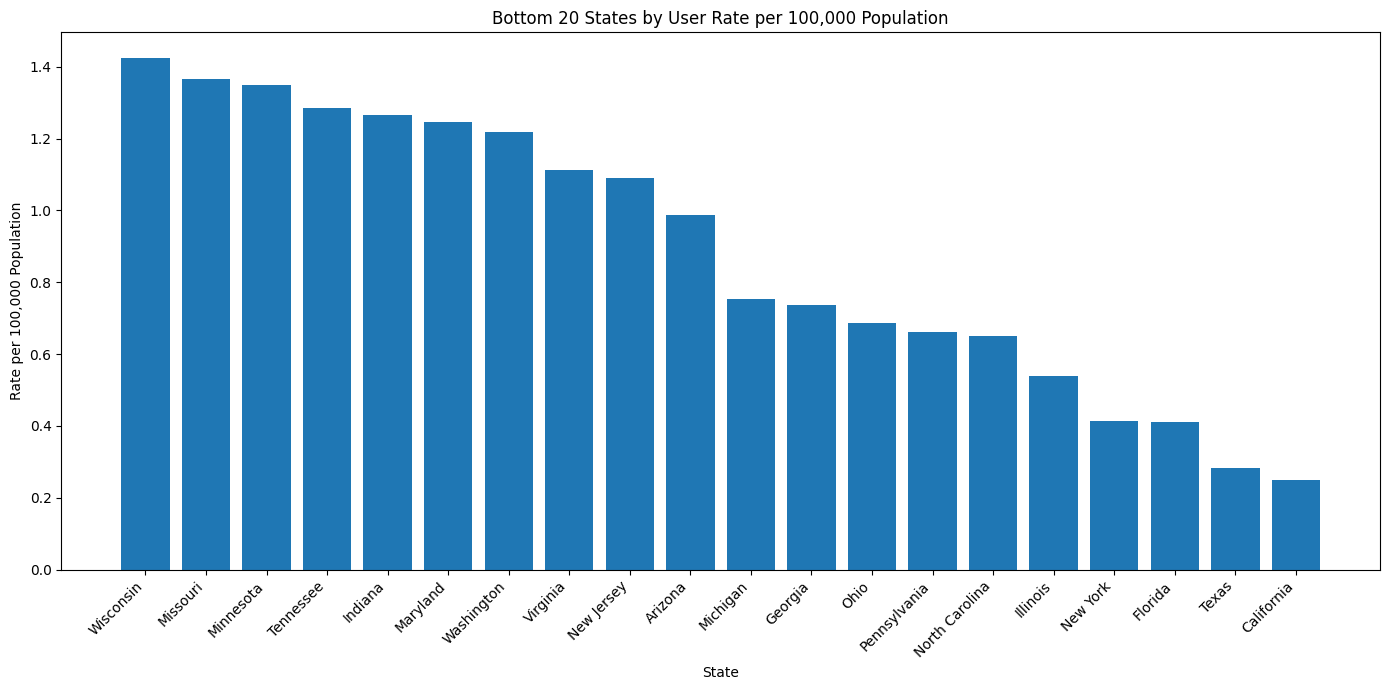

In [185]:
plt.figure(figsize=(14, 7))
plt.bar(bottom_20_states_by_rate['State'], bottom_20_states_by_rate['Rate_Per_100K'])
plt.title('Bottom 20 States by User Rate per 100,000 Population')
plt.xlabel('State')
plt.ylabel('Rate per 100,000 Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

### 4.5 Customer Demographics

#### 4.5.1 Age Distribution

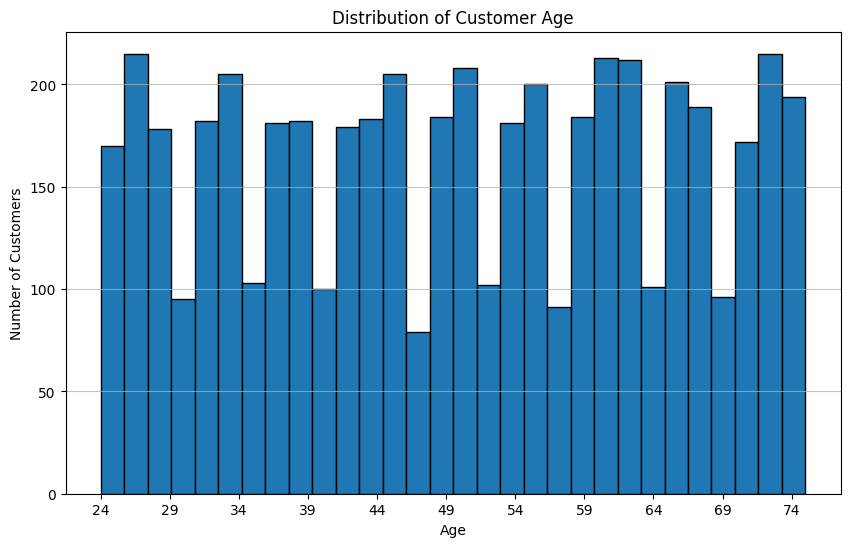

In [186]:
plt.figure(figsize=(10, 6))
plt.hist(updated_users['Age'], bins=30, edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)

# Set x-axis ticks from 0 to 100 in steps of 10
plt.xticks(np.arange(min(updated_users["Age"]), max(updated_users["Age"]), 5));

#### 4.5.2 Age Group Preferences

In [187]:
# # Adding Sale Price from json to the Products csv
# updated_products["Sold for"] = products_json["sale_price"]

In [188]:
# # Verifying update
# updated_products.head(2)

In [189]:
# #Converting Column values to numeric
# converted = pd.to_numeric(updated_products['Sold for'], errors='coerce')

In [190]:
# # Identify entries that failed conversion
# non_numeric_entries = updated_products.loc[converted.isna(), 'Sold for'].unique().tolist()

In [191]:
# # Printing first 5 non_numeric entries
# non_numeric_entries[:5]

In [192]:
# # Checking the length of the non numeric entries
# len(non_numeric_entries)/len(products)

In [193]:
# # Removing rows with non-numeric values in "Sold for" since they are less than 3%
# updated_products = updated_products[~updated_products['Sold for'].isin(non_numeric_entries)]

In [194]:
updated_products.isna().sum()

,0
Uniq_id,0
SKU,0
Name,0
Description,543
Price,2166
Av_Score,0


# Users

In [195]:
#Find rate per 100,000. Chose that as the standardization factor because of the population size

The users data can give more insights with the help of the reviews data. I would load that as well


In [196]:
# # Get the top 10 most frequent product names (already calculated in a previous cell)
# top_10_product_names = top_10_product_name_counts.index.tolist()

# # Filter the merged data (containing names and reviews) to include only the top 10 products
# reviews_for_top_products_with_names = merged_data_with_names[merged_data_with_names['Name'].isin(top_10_product_names)]

# # Group by product name and get the unique age groups that reviewed each product
# age_groups_by_top_product = reviews_for_top_products_with_names.groupby('Name')['Age_Group'].unique()

# print("Age groups that reviewed the top 10 most frequently occurring products:")
# age_groups_by_top_product

In [197]:
# # Iterate through the 'category' column in the products_json DataFrame
# all_categories = [
#     'Uncategorised' if (not c or pd.isna(c)) else c
#     for category_list in products_json['category']
#     for c in (
#         category_list if isinstance(category_list, list)
#         else [category_list] if isinstance(category_list, str)
#         else [None]
#     )
# ]

In [198]:
# # Count the occurrences of each category
# category_counts = pd.Series(all_categories).value_counts()

In [199]:
# # Get the top 50 most frequent categories
# top_20_categories = category_counts.head(20)

In [200]:
# # Plot the top 20 most frequently bought categories
# plot_top_distribution(
# data= top_20_categories,
# title='Top 20 Most Frequently Bought Categories',
# xlabel='Category',
# ylabel = 'Number of Products',
# )